<a href="https://colab.research.google.com/github/FaraazArsath/K-Means-Clustering/blob/main/Unsupervised_Learning_K_Means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K - Means Clustering**

Old Faithful Geyser Data

Description:

     Waiting time between eruptions and the duration of the eruption
     for the Old Faithful geyser in Yellowstone National Park, Wyoming,
     USA.

     A data frame with 272 observations on 2 variables.

eruptions  numeric  Eruption time in mins
waiting    numeric  Waiting time to next eruption

References:

     Hardle, W. (1991) Smoothing Techniques with Implementation in S.
     New York: Springer.

     Azzalini, A. and Bowman, A. W. (1990). A look at some data on the
     Old Faithful geyser. Applied Statistics 39, 357-365.

**Loading Data**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv("faithful.txt")
print(df.shape)
df.head()

(272, 3)


,Index,"""Eruption length (mins)""",Eruption wait (mins)
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


**Cleaning Data**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      272 non-null    int64  
 1    "Eruption length (mins)"  272 non-null    float64
 2   Eruption wait (mins)       272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


In [119]:
df.duplicated().sum()

0

In [120]:
# drpping index column

df = df.drop(columns='Index')
df.head()

,"""Eruption length (mins)""",Eruption wait (mins)
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [121]:
df.nunique()

 "Eruption length (mins)"    126
Eruption wait (mins)          51
dtype: int64

In [122]:
df.describe()

,"""Eruption length (mins)""",Eruption wait (mins)
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [123]:
# checking for outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

 "Eruption length (mins)"    0
Eruption wait (mins)         0
dtype: int64

**EDA**

Text(0.5, 1.0, 'Eruption length VS Eruption wait')

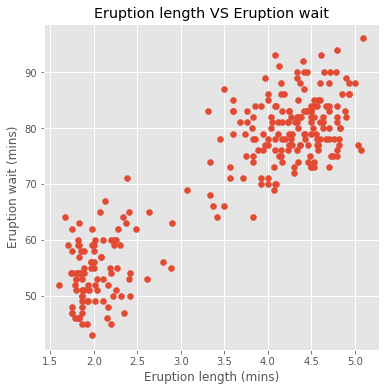

In [124]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel("Eruption length (mins)")
plt.ylabel("Eruption wait (mins)")
plt.title("Eruption length VS Eruption wait")

**Standardisation**

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [126]:
X_std

array([[ 0.09849886,  0.59712344],
       [-1.48145856, -1.24518118],
       [-0.13586149,  0.22866251],
       [-1.05750332, -0.6556437 ],
       [ 0.91744345,  1.03927655],
       [-0.53085085, -1.171489  ],
       [ 1.06402839,  1.2603531 ],
       [ 0.09849886,  1.03927655],
       [-1.34979544, -1.46625773],
       [ 0.75681445,  1.03927655],
       [-1.45249268, -1.24518118],
       [ 0.37674691,  0.96558436],
       [ 0.62515133,  0.52343125],
       [-1.52534627, -1.76102647],
       [ 1.06402839,  0.89189218],
       [-1.1593228 , -1.39256555],
       [-1.52534627, -0.6556437 ],
       [ 1.1518038 ,  0.96558436],
       [-1.65700939, -1.39256555],
       [ 0.66903904,  0.59712344],
       [-1.48145856, -1.46625773],
       [-1.52534627, -1.76102647],
       [-0.03316426,  0.52343125],
       [-0.36934409, -0.13979841],
       [ 0.91744345,  0.22866251],
       [ 0.09849886,  0.89189218],
       [-1.33487362, -1.171489  ],
       [ 0.5224541 ,  0.37604688],
       [ 0.31793739,

**Determing K value - using Elbow Plot**

The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. 

An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS) or Inertia.

WCSS or Inertia is the sum of squares of the distances of each data point in all clusters to their respective centroids.

We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the inertia for each K value. 

Text(0, 0.5, 'inertia')

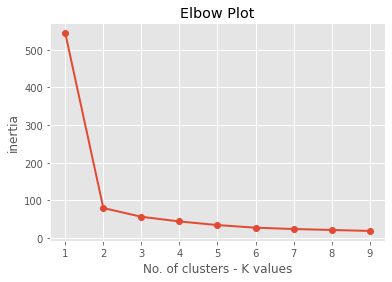

In [127]:
from sklearn.cluster import KMeans
inertias = []
list_k = list(range(1,10))
for k in list_k :
  km = KMeans(n_clusters = k)
  km.fit(X_std)
  inertias.append(km.inertia_)

plt.plot(list_k,inertias,'-o')
plt.title('Elbow Plot',color='black')
plt.xlabel('No. of clusters - K values')
plt.ylabel('inertia')

For the above-given graph, the optimum value for K would be 2

**Determing K value - using silhouette analysis**

For n_clusters = 2 The average silhouette_score is : 0.7451774401188772
For n_clusters = 3 The average silhouette_score is : 0.4850815668329722
For n_clusters = 4 The average silhouette_score is : 0.3818755094875793
For n_clusters = 5 The average silhouette_score is : 0.36212084788408866
For n_clusters = 6 The average silhouette_score is : 0.39468913460035954


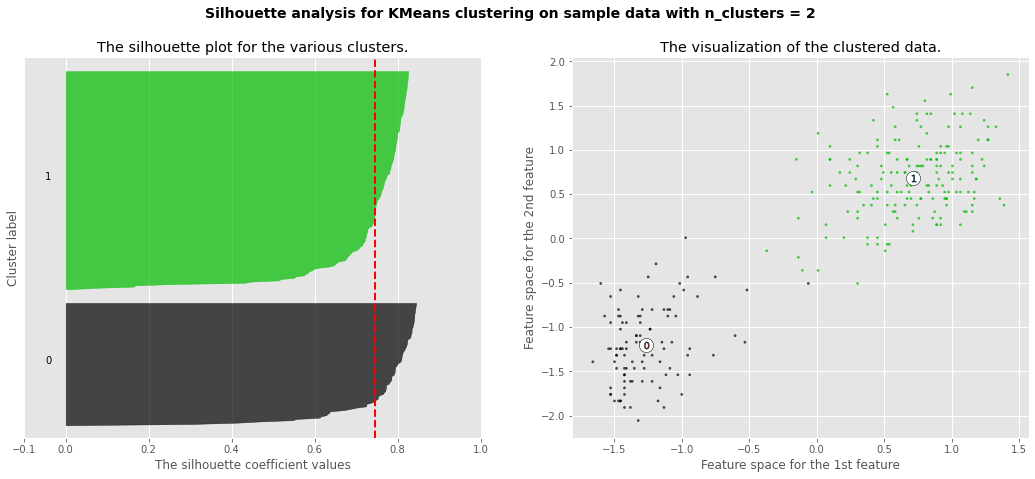

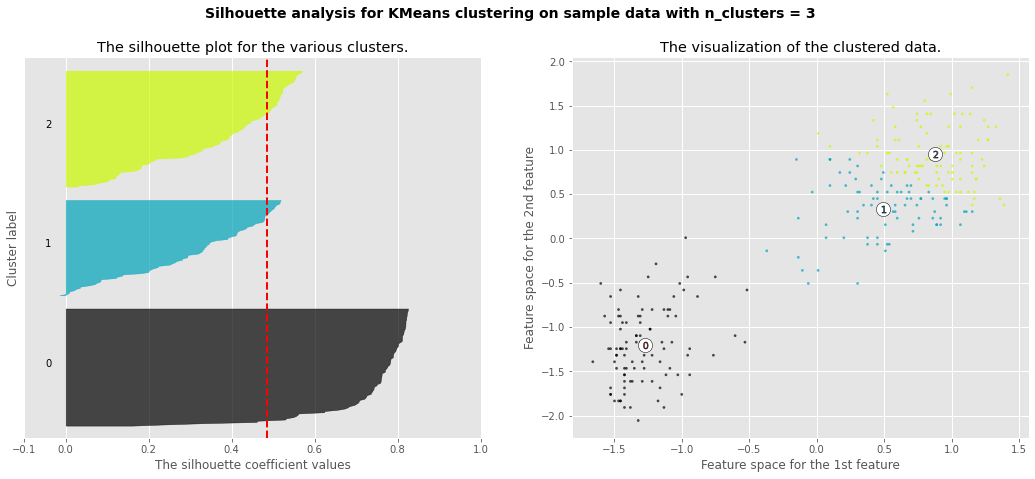

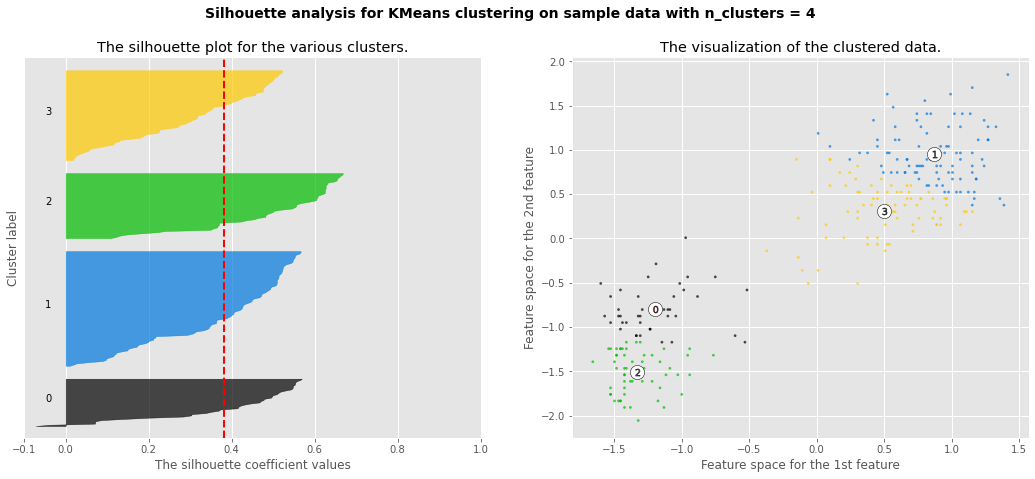

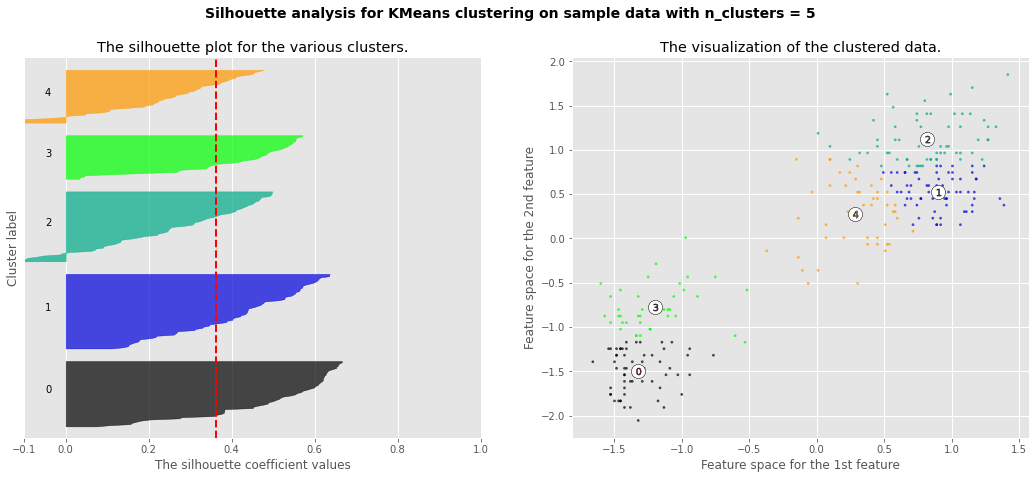

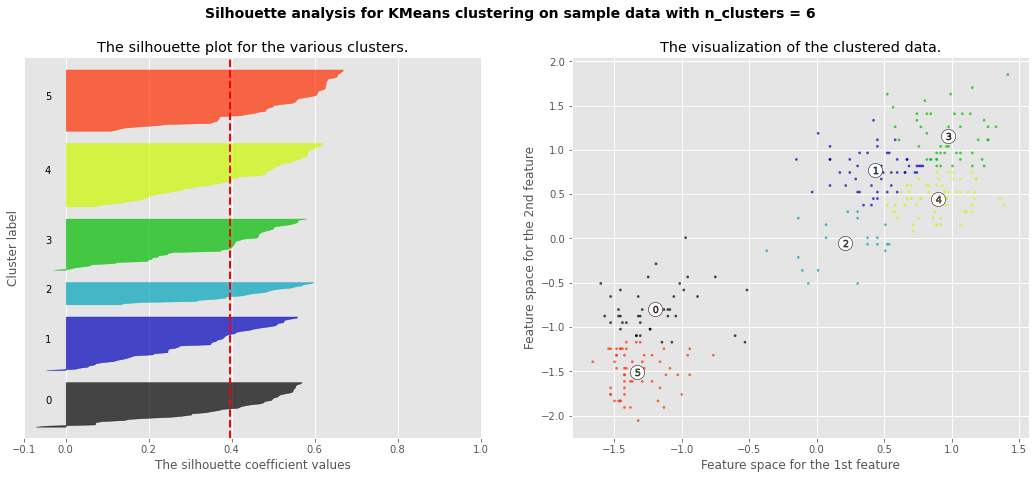

In [128]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_std) + (n_clusters + 1) * 10])

     # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)

       # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_std[:, 0], X_std[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

From silhouette analysis , optimum clusters is 2

**Fitting into Model**

In [129]:
km = KMeans(n_clusters =2,init='k-means++',random_state=1)
km.fit(X_std)

KMeans(n_clusters=2, random_state=1)

In [130]:
# knowing centroids

centroids = km.cluster_centers_
centroids

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

In [131]:
# knowing each datapoints which cluter is assigned

cluster = km.labels_  # km.predict(X_std)
cluster

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [132]:
# knowing inertia value

km.inertia_

79.575959488277

In [133]:
# looking at the value count of points in each of the above-formed clusters:

frame = pd.DataFrame(X_std)
frame['cluster'] = cluster
frame['cluster'].value_counts()

0    174
1     98
Name: cluster, dtype: int64

**Vizualization of the clustered Data**

Text(0.5, 1.0, 'Visualization of clustered data')

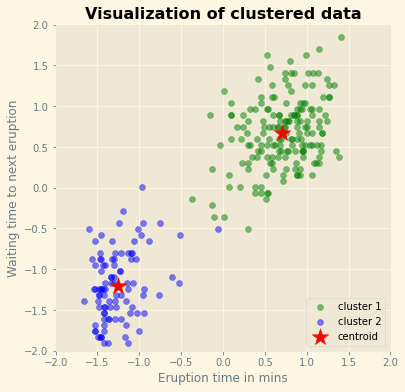

In [134]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1',alpha=0.5)
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2',alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend(loc='lower right')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data',color='black',fontweight='bold')

**Observations :**

The two clusters in data interprets that there are two series of eruptions in this dataset.

*   Eruptions with short intervals and eruptions with long intervals.Eruptions more than 3 minutes is clustered as longer intervals.
*   The eruptions with long intervals is having longer waiting time to next erption than short interval eruptions.
*   The geyser is having an increasing number of long eruptions than shorter eruptions.



**Impact of Random initialisation** - Random Initialization Trap

Drawback of K-Means clustering is the random initialisation of centroids. The formation of clusters is closely bound by the initial position of a centroid. The random positioning of the centroids can completely alter clusters and can result in a random formation.

90840
68252
60134
4941
68148
96313
5087
84924
38394


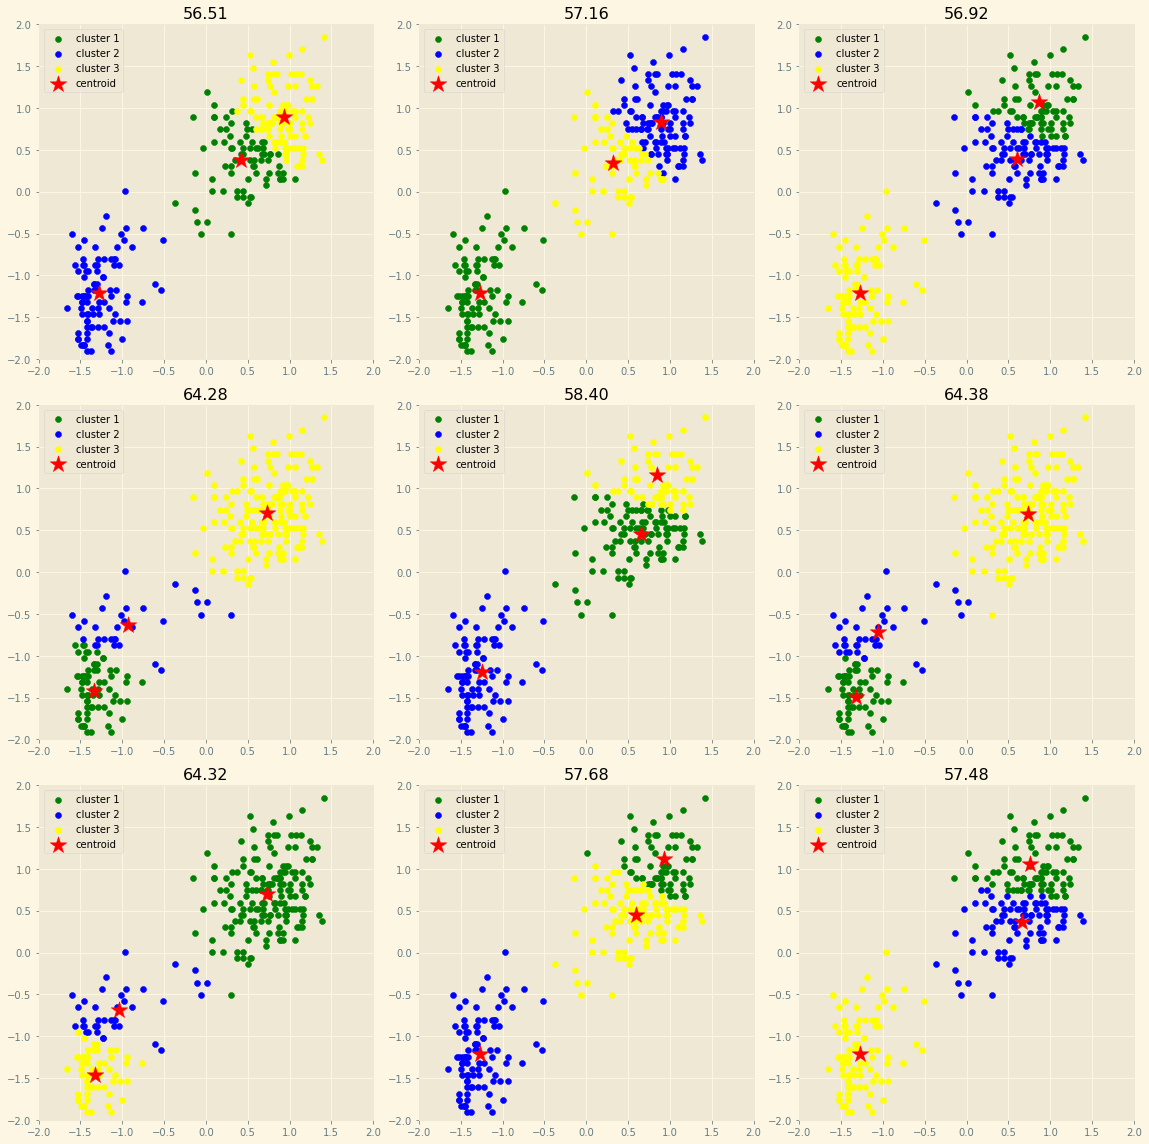

In [135]:
# example of impact of random initialization whith 3 clusters 

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    seed = np.random.randint(0, 100000, size=1)[0]
    print(seed)
    km = KMeans(n_clusters=3,max_iter=3,init = 'random',n_init=1,random_state=np.random.RandomState(seed))
    km.fit(X_std)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
                  c='yellow', label='cluster 3')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend()
    ax[i].set_title(f'{km.inertia_:.2f}',color='black')
    ax[i].set_aspect('equal')
plt.tight_layout()

The solution to Random Initialization trap is K-means++. 

K-Means++ is an algorithm that is used to initialise the K-Means algorithm.